 **Regular lab Question – 6**

**Time-Series Prediction with RNN**

1. Data Preprocessing:
- Load the dataset and focus on the 'Close' price column, as this will be
your target variable for prediction.
- Normalize the data (e.g., using Min-Max scaling to keep values between 0
and 1).
- Split the dataset into a training set (80%) and a testing set (20%).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

file_path = 'HistoricalQuotes.csv'
data = pd.read_csv(file_path)


data.columns = data.columns.str.strip()

# Remove the dollar sign in 'Close/Last' column and convert to numeric
data['Close'] = data['Close/Last'].replace('[\$,]', '', regex=True).astype(float)

# Normalize the 'Close' column using Min-Max scaling
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])

# Split the data into training (80%) and testing (20%) sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)


train_data[['Date', 'Close']].head(), test_data[['Date', 'Close']].head()


(         Date     Close
 0  02/28/2020  0.818943
 1  02/27/2020  0.819481
 2  02/26/2020  0.883813
 3  02/25/2020  0.868444
 4  02/24/2020  0.902409,
             Date     Close
 2014  02/27/2012  0.152247
 2015  02/24/2012  0.150638
 2016  02/23/2012  0.147746
 2017  02/22/2012  0.146136
 2018  02/21/2012  0.147006)

2. Create Training Sequences:
o Convert the 'Close' prices into a series of sequences for training.
o Define a sequence length (e.g., 60 days), where each sequence will be
used to predict the stock price for the next day.

In [ ]:
import numpy as np


sequence_length = 60

# Function to create sequences for training
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    close_prices = data['Close'].values

    for i in range(len(close_prices) - sequence_length):
        # Create sequences of specified length and the next day's close price as target
        sequences.append(close_prices[i:i + sequence_length])
        targets.append(close_prices[i + sequence_length])

    return np.array(sequences), np.array(targets)

# Create sequences and targets for the training data
train_sequences, train_targets = create_sequences(train_data, sequence_length)


train_sequences.shape, train_targets.shape


((1954, 60), (1954,))

3. Build the RNN Model:
o Define an RNN model with the following architecture:
▪ An RNN layer with 50 units
▪ A Dense layer with 1 unit (for regression output)
o Use the mean squared error (MSE) loss function and the Adam optimizer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Reshape sequences to fit the RNN input (samples, time steps, features)
train_sequences = np.reshape(train_sequences, (train_sequences.shape[0], train_sequences.shape[1], 1))

# Define the RNN model
model = Sequential([
    SimpleRNN(50, input_shape=(sequence_length, 1)),  # RNN layer with 50 units
    Dense(1)  # Output layer with 1 unit for regression
])

# Compile the model with MSE loss and Adam optimizer
model.compile(optimizer=Adam(), loss='mean_squared_error')


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model:

- Train the model on the training set for 50 epochs with a batch size of 32.

- Use validation data to check for overfitting.

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.0545 - val_loss: 6.5447e-04
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.6049e-04 - val_loss: 2.8331e-04
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.4616e-04 - val_loss: 2.5973e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9595e-04 - val_loss: 1.9736e-04
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5098e-04 - val_loss: 2.0608e-04
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8139e-04 - val_loss: 1.9661e-04
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.5754e-04 - val_loss: 1.3898e-04
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.5242e-04 - val_loss: 1.1191e-04
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4750e-04 - val_loss: 1.1342e-04
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.2589e-04 - val_loss: 1.1741e-04
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2778e-04 - 

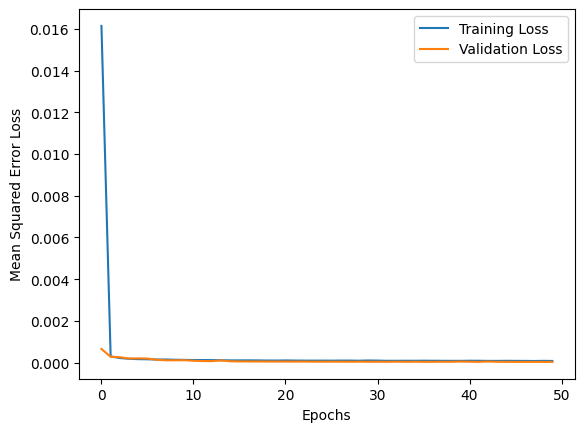

In [ ]:
# Train the model on the training set
history = model.fit(
    train_sequences,
    train_targets,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

# Display the training and validation loss history
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


5. Make Predictions:
- Predict the stock prices on the test set and transform the results back to
the original scale if normalization was applied.
- Plot the predicted vs. actual stock prices to visualize the model’s
performance.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


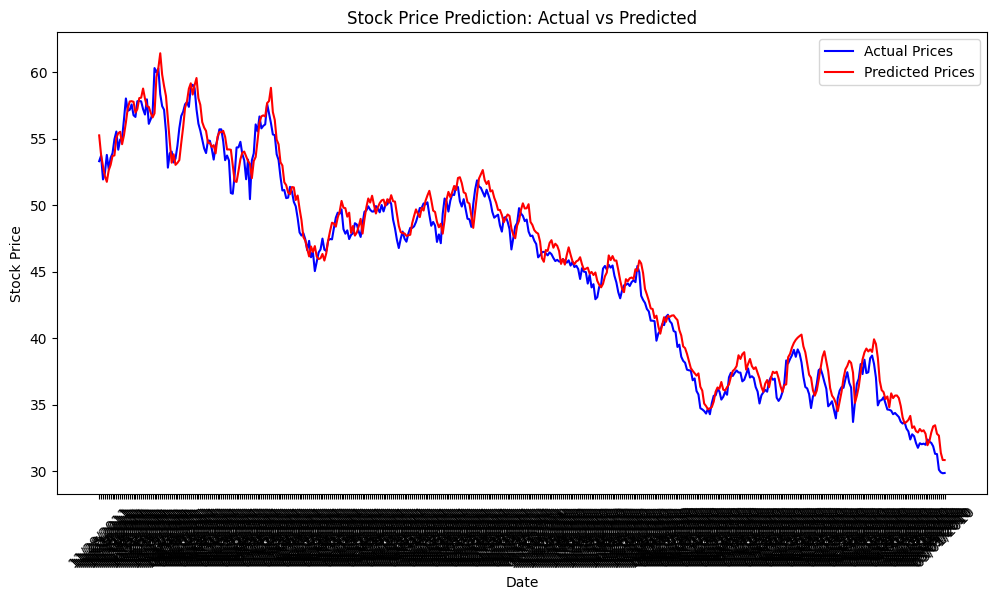

In [ ]:
# Create sequences for the test data
test_sequences, test_targets = create_sequences(test_data, sequence_length)

# Reshape test sequences to match the RNN input shape
test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], test_sequences.shape[1], 1))

# Predict stock prices using the trained model
predictions = model.predict(test_sequences)

# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions)
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

# Plot the predicted vs. actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'][sequence_length:].values, test_targets, label='Actual Prices', color='blue')
plt.plot(test_data['Date'][sequence_length:].values, predictions, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction: Actual vs Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Evaluation:
- Calculate the mean absolute error (MAE) and root mean squared error
(RMSE) on the test set.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_targets, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_targets, predictions))

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.9285466030705082
Root Mean Squared Error (RMSE): 1.160625723243161


- Discuss how well the model performed based on these metrics.

Based on the error results, the model is performing reasonably well, but there is still some room for improvement.

- The loss curves (Training Loss vs. Validation Loss) suggest that the model achieved rapid convergence.
- This is indicated by the steep drop in the training loss at the very beginning of the training, which likely reflects the model adapting quickly to the patterns in the training data.
- After the initial drop, both training and validation loss stabilize at very low values, indicating that the model is fitting the data well and not overfitting significantly, as both curves remain relatively close to each other.

The predicted stock prices match the actual stock prices. The predicted and actual prices closely follow each other, suggesting that the model captures the general trend of the stock prices effectively. However, some small discrepancies can still be observed, particularly in the oscillations of the stock prices.



**LIMITATIONS:**

The RNN model used here is relatively simple with just one RNN layer and no other features like technical indicators, market news, or other external variables.

Although the loss curves suggest the model is not overfitting, there is always the possibility that the model might overfit if trained for more epochs, especially with limited features.